In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#import tensorflow as tf

#tf.config.run_functions_eagerly(True)

In [3]:


df = pd.read_csv('FormattedData/train.csv',index_col='Timestamp',infer_datetime_format=True)

test = pd.read_csv('FormattedData/test.csv', index_col='Timestamp', infer_datetime_format=True)

df.head()



,MON1 CL DDM (?A),MON1 CL RF (dB),MON1 DS DDM (?A),MON1 DS RF (dB),MON1 NF DDM (?A),MON1 NF RF (dB),MON1 CLR DDM (?A),MON1 CLR RF (dB)
Timestamp,,,,,,,,
2022-02-09 09:42:12,3.76,0.31,2.31,0.26,-2.89,0.17,6.07,0.30
2022-02-09 09:47:12,3.18,0.31,2.31,0.26,-2.31,0.14,6.94,0.28
2022-02-09 09:52:13,3.47,0.31,2.02,0.26,-2.60,0.13,7.23,0.28
2022-02-09 09:57:13,3.47,0.30,2.02,0.25,-2.02,0.14,6.94,0.28
2022-02-09 10:02:13,3.47,0.30,2.02,0.25,-2.02,0.10,7.23,0.28


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11936 entries, 2022-02-09 09:42:12 to 2022-03-23 12:30:45
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MON1 CL DDM (?A)   11936 non-null  float64
 1   MON1 CL RF (dB)    11936 non-null  float64
 2   MON1 DS DDM (?A)   11936 non-null  float64
 3   MON1 DS RF (dB)    11936 non-null  float64
 4   MON1 NF DDM (?A)   11936 non-null  float64
 5   MON1 NF RF (dB)    11936 non-null  float64
 6   MON1 CLR DDM (?A)  11936 non-null  float64
 7   MON1 CLR RF (dB)   11936 non-null  float64
dtypes: float64(8)
memory usage: 839.2+ KB


In [5]:
len(df)

11936

In [6]:
#test = df.iloc[:-8000]
train = df.iloc[-8000:]


In [7]:
train

,MON1 CL DDM (?A),MON1 CL RF (dB),MON1 DS DDM (?A),MON1 DS RF (dB),MON1 NF DDM (?A),MON1 NF RF (dB),MON1 CLR DDM (?A),MON1 CLR RF (dB)
Timestamp,,,,,,,,
2022-02-23 17:09:50,3.18,0.30,1.16,0.27,-23.43,0.57,4.34,0.30
2022-02-23 17:14:50,3.18,0.30,0.87,0.27,-23.43,0.54,4.34,0.30
2022-02-23 17:19:51,2.89,0.30,1.45,0.27,-22.85,0.54,4.34,0.30
2022-02-23 17:24:51,2.89,0.30,1.45,0.27,-22.56,0.53,4.34,0.30
2022-02-23 17:29:51,3.18,0.30,1.45,0.27,-22.27,0.51,4.34,0.30
...,...,...,...,...,...,...,...,...
2022-03-23 12:10:44,1.74,0.22,1.16,0.20,-1.45,0.00,2.60,0.24
2022-03-23 12:15:44,1.74,0.23,0.87,0.20,-1.45,0.00,2.60,0.25
2022-03-23 12:20:45,1.74,0.23,1.16,0.20,-1.45,0.00,2.60,0.25


In [8]:
test

,MON1 CL DDM (?A),MON1 CL RF (dB),MON1 DS DDM (?A),MON1 DS RF (dB),MON1 NF DDM (?A),MON1 NF RF (dB),MON1 CLR DDM (?A),MON1 CLR RF (dB)
Timestamp,,,,,,,,
2022-01-28 14:11:19,2.02,0.32,0.87,0.29,-3.18,0.19,2.31,0.34
2022-01-28 14:16:19,1.74,0.32,0.87,0.29,-2.89,0.19,2.31,0.34
2022-01-28 14:21:20,1.74,0.32,0.87,0.29,-3.18,0.19,2.60,0.34
2022-01-28 14:26:20,0.29,-39.90,-76.94,-39.90,0.00,-39.90,-322.78,-35.61
2022-01-28 14:31:20,0.00,-39.90,-76.94,-39.90,0.00,-39.90,-322.49,-35.61
...,...,...,...,...,...,...,...,...
2022-02-09 07:00:38,2.60,0.29,1.45,0.26,-1.74,0.18,4.92,0.28
2022-02-09 07:05:38,2.60,0.29,1.45,0.26,-2.02,0.19,4.63,0.29
2022-02-09 07:10:38,2.60,0.29,1.74,0.26,-2.31,0.19,4.63,0.28


In [9]:


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train)



In [ ]:


scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)



In [ ]:


from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# define generator
length = 24 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)




In [ ]:
len(scaled_train)

8000

In [ ]:
len(generator)

7976

In [ ]:


X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')




Given the Array: 
[0.68682505 0.99666428 0.9818959  0.99627976 0.         1.
 0.98863636 0.99584027 0.68682505 0.99666428 0.97824994 0.99627976
 0.         0.99925871 0.98863636 0.99584027 0.62419006 0.99666428
 0.98554187 0.99627976 0.02110626 0.99925871 0.98863636 0.99584027
 0.62419006 0.99666428 0.98554187 0.99627976 0.03165939 0.99901161
 0.98863636 0.99584027 0.68682505 0.99666428 0.98554187 0.99627976
 0.04221252 0.99851742 0.98863636 0.99584027 0.68682505 0.99666428
 0.9818959  0.99627976 0.05276565 0.99802323 0.98863636 0.99584027
 0.68682505 0.99666428 0.98554187 0.99627976 0.05276565 0.99777613
 0.98863636 0.99584027 0.62419006 0.99666428 0.98554187 0.99627976
 0.07387191 0.99728194 0.98775991 0.99584027 0.62419006 0.99666428
 0.9818959  0.99627976 0.08442504 0.99728194 0.98863636 0.99584027
 0.62419006 0.99690255 0.9818959  0.99652778 0.09497817 0.99703484
 0.98775991 0.99611758 0.56155508 0.99714081 0.9818959  0.99677579
 0.10516739 0.99752903 0.98513056 0.9963949  0.68682

In [ ]:


#Create model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

scaled_train.shape



(8000, 8)

In [ ]:
import tensorflow as tf

tf.random.set_seed(1234)

model = Sequential()

# Simple RNN layer
model.add(LSTM(10,input_shape=(length,scaled_train.shape[1])))

# Final Prediction (one neuron per feature)
model.add(Dense(scaled_train.shape[1]))

model.compile(optimizer='adam', loss='mse')



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                760       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
Total params: 848
Trainable params: 848
Non-trainable params: 0
_________________________________________________________________


In [ ]:


#from tensorflow.keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test, 
                                           length=length, batch_size=batch_size)




In [ ]:


model.fit(generator,epochs=4, validation_data=validation_generator)



Epoch 1/4
7976/7976 [==============================] - 46s 6ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 2/4
7976/7976 [==============================] - 44s 5ms/step - loss: 4.6593e-04 - val_loss: 0.0026
Epoch 3/4
7976/7976 [==============================] - 44s 5ms/step - loss: 4.2518e-04 - val_loss: 0.0026
Epoch 4/4
7976/7976 [==============================] - 45s 6ms/step - loss: 3.9065e-04 - val_loss: 0.0024


In [ ]:
dataTwo = {'Model': ["LSTM"], 'Optimizer': ["adam"], 'Loss-Function': ["mse"], 'Epochs' : ["10"], 'Num of nodes': "10", 'Callbacks' : "None", 'Batch-Size': [batch_size], 'Length' : [length]}

df = pd.DataFrame(dataTwo)
df.head()


,Model,Optimizer,Loss-Function,Epochs,Num of nodes,Callbacks,Batch-Size,Length
0,LSTM,adam,mse,10,10,None,1,24


In [ ]:
model.history.history.keys()

dict_keys(['loss', 'val_loss'])

<AxesSubplot:>

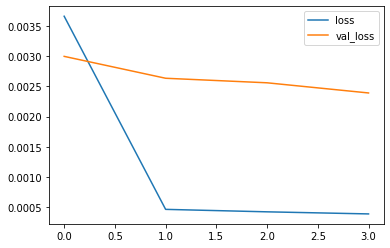

In [ ]:


losses = pd.DataFrame(model.history.history)
losses.plot()






In [ ]:
first_eval_batch = scaled_train[-length:]



first_eval_batch



array([[0.4362851 , 0.99475816, 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98425411, 0.99445369],
       [0.4362851 , 0.99475816, 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98513056, 0.99445369],
       [0.37580994, 0.99475816, 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98425411, 0.99417637],
       [0.37580994, 0.99475816, 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98513056, 0.99417637],
       [0.4362851 , 0.99475816, 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98513056, 0.99417637],
       [0.37580994, 0.9945199 , 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98513056, 0.99389906],
       [0.4362851 , 0.9945199 , 0.97824994, 0.99429563, 0.81040757,
        0.9856684 , 0.98425411, 0.99389906],
       [0.37580994, 0.9945199 , 0.9818959 , 0.99429563, 0.81040757,
        0.9856684 , 0.98425411, 0.99389906],
       [0.37580994, 0.9945199 , 0.9818959 , 0.99404762, 0.81040757,
        0.9854213 , 0.985130

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, length, scaled_train.shape[1]))

In [ ]:
model.predict(first_eval_batch)

array([[0.38572553, 1.0000905 , 0.97360456, 0.99709743, 0.8148068 ,
        0.9892904 , 0.9812579 , 0.9960429 ]], dtype=float32)

In [ ]:
n_features = scaled_train.shape[1]
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.38572553, 1.0000905 , 0.97360456, 0.99709743, 0.8148068 ,
        0.9892904 , 0.9812579 , 0.9960429 ], dtype=float32),
 array([0.39098597, 0.9984962 , 0.9768415 , 0.99704164, 0.81259334,
        0.9895694 , 0.98264766, 0.9970082 ], dtype=float32),
 array([0.39467275, 0.9985504 , 0.97683096, 0.99690604, 0.8128278 ,
        0.9896556 , 0.9827436 , 0.99687725], dtype=float32),
 array([0.39819065, 0.9985329 , 0.97694653, 0.99684864, 0.8129977 ,
        0.98959243, 0.98290193, 0.9967857 ], dtype=float32),
 array([0.40152994, 0.99852014, 0.97701865, 0.99678326, 0.81334376,
        0.9895365 , 0.9830041 , 0.996728  ], dtype=float32),
 array([0.40473625, 0.99848676, 0.9771012 , 0.99672526, 0.8138293 ,
        0.9894824 , 0.9830909 , 0.99669003], dtype=float32),
 array([0.40782115, 0.998446  , 0.9771817 , 0.99667424, 0.8144635 ,
        0.9894401 , 0.9831549 , 0.99666995], dtype=float32),
 array([0.41079423, 0.99840283, 0.9772607 , 0.9966305 , 0.8152298 ,
        0.98940474, 0.9832065

In [ ]:
scaled_test

array([[0.4362851 , 0.99714081, 0.97824994, ..., 0.99061033, 0.98250121,
        0.99694953],
       [0.37580994, 0.99714081, 0.97824994, ..., 0.99061033, 0.98250121,
        0.99694953],
       [0.37580994, 0.99714081, 0.97824994, ..., 0.99061033, 0.98337766,
        0.99694953],
       ...,
       [0.56155508, 0.99642602, 0.98918783, ..., 0.99061033, 0.98951281,
        0.99528564],
       [0.56155508, 0.99666428, 0.98554187, ..., 0.99011614, 0.98951281,
        0.99528564],
       [0.56155508, 0.99666428, 0.98554187, ..., 0.99085743, 0.98951281,
        0.99556295]])

In [ ]:

true_predictions = scaler.inverse_transform(test_predictions)


In [ ]:


true_predictions



array([[ 1.78590919,  0.44379744,  0.50050669, ...,  0.13658315,
         1.89861908,  0.30730724],
       [ 1.81026502,  0.37688446,  0.75797365, ...,  0.14787465,
         2.35845688,  0.34211585],
       [ 1.82733484,  0.37916092,  0.7571345 , ...,  0.15136269,
         2.39020927,  0.33739375],
       ...,
       [ 4.1093264 ,  0.89003409,  0.35069257, ..., -0.35123606,
         6.74557297, -0.33273072],
       [ 4.1093264 ,  0.89003409,  0.35069257, ..., -0.35123847,
         6.74561241, -0.33273072],
       [ 4.1093264 ,  0.89003409,  0.35069257, ..., -0.35123606,
         6.74561241, -0.33273072]])

In [ ]:


true_predictions = pd.DataFrame(data=true_predictions,columns=test.columns)



In [ ]:
true_predictions.head(4000)

,MON1 CL DDM (?A),MON1 CL RF (dB),MON1 DS DDM (?A),MON1 DS RF (dB),MON1 NF DDM (?A),MON1 NF RF (dB),MON1 CLR DDM (?A),MON1 CLR RF (dB)
0,1.785909,0.443797,0.500507,0.302968,-1.039109,0.136583,1.898619,0.307307
1,1.810265,0.376884,0.757974,0.300719,-1.099935,0.147875,2.358457,0.342116
2,1.827335,0.379161,0.757135,0.295252,-1.093491,0.151363,2.390209,0.337394
3,1.843623,0.378425,0.766327,0.292937,-1.088823,0.148806,2.442591,0.334092
4,1.859084,0.377890,0.772064,0.290301,-1.079313,0.146543,2.476394,0.332012
...,...,...,...,...,...,...,...,...
3366,4.109326,0.890034,0.350693,0.253949,3.491557,-0.351236,6.745612,-0.332733
3367,4.109326,0.890034,0.350693,0.253949,3.491557,-0.351236,6.745612,-0.332731
3368,4.109326,0.890034,0.350693,0.253949,3.491554,-0.351236,6.745573,-0.332731
3369,4.109326,0.890034,0.350693,0.253949,3.491554,-0.351238,6.745612,-0.332731


In [ ]:
from tensorflow.keras.models import load_model

model.save("multivariate.h5")

In [ ]:
from tensorflow import keras

mse = tf.keras.losses.MeanSquaredError()
loss = mse(test_predictions,scaled_test)
print('MSE: ', loss.numpy())


2022-05-16 19:30:55.583525: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-16 19:30:55.583584: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


NameError: name 'tf' is not defined